In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/rajesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rajesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rajesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)
df

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...
...,...,...
56397,"Alexandria Ocasio-Cortez said ""Going by track ...","I think she’s right, one is a homosexual with ..."
56398,Is becoming a doctor financially worth it?,Yes if you want to help people and eliminate p...
56399,Where can one find the best biryani in bangalore?,Biryani crafts.These guys will give proper aut...
56400,Which smartphone is best for middle class people?,Oneplus nord\n[LINKED_TEXT: https://latesttech...


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 881.4+ KB
None


In [27]:
print(df.head())

                                            question  \
0  Why whenever I get in the shower my girlfriend...   
1            What is a proxy, and how can I use one?   
2  What song has the lyrics "someone left the cak...   
3  I am the owner of an adult website called http...   
4  Does the Bible mention anything about a place ...   

                                              answer  
0  Isn’t it awful? You would swear that there was...  
1  A proxy server is a system or router that prov...  
2                                 MacArthur's Park\n  
3  Don't let apps that are liers put adds on your...  
4  St. John in the book of Revelation mentions an...  


In [28]:
print(df.describe())

                                                 question answer
count                                               56402  56402
unique                                               3234  54726
top     Would Hillary Clinton have made a better Presi...   No\n
freq                                                  106     89


In [29]:
# Check for missing values
print(df.isnull().sum())

question    0
answer      0
dtype: int64


2. Remove Duplicates and Handle Missing Values


In [50]:
# Check for duplicate rows based on 'question' and 'answer'
duplicates = df[df.duplicated(subset=['question', 'answer'])]
duplicates


,question,answer
1323,Do vocal exercises really help your singing be...,Click here to know some basic singing tips\n [...
1646,x^{2}+y^{2}=2,1\n
2148,"What is a proxy, and how can I use one?",Proxy server basically acts as an intermediary...
2511,Why are Tempurpedic beds so expensive?,In terms of brand reliability - Sleepwell >= S...
2909,I forgot my Apple ID password how can I reset it?,"I forgot my Apple ID and Password, what should..."
...,...,...
56232,Can you show me your shirtless body (only boys)?,Ignore how messy my room is👀\n
56251,Is Hindi language meant to unite Indians or to...,languages are for communication and to express...
56289,I want to use C++ to learn Machine Learning in...,Yes you can always learn any subject with any ...
56312,The Mahabharata,Arjuna was considered to be the most powerful ...


In [51]:
duplicate_count = df.duplicated(subset=['question', 'answer']).sum()
duplicate_count

1220

In [52]:

df_cleaned = df.drop_duplicates(subset=['question', 'answer'])
df_cleaned.reset_index(drop=True, inplace=True)


In [53]:
df = df_cleaned
df

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...
...,...,...
55177,"Alexandria Ocasio-Cortez said ""Going by track ...","I think she’s right, one is a homosexual with ..."
55178,Is becoming a doctor financially worth it?,Yes if you want to help people and eliminate p...
55179,Where can one find the best biryani in bangalore?,Biryani crafts.These guys will give proper aut...
55180,Which smartphone is best for middle class people?,Oneplus nord\n[LINKED_TEXT: https://latesttech...


In [34]:
df.describe()

,question,answer
count,55182,55182
unique,3234,54726
top,Would Hillary Clinton have made a better Presi...,Yes\n
freq,106,56


3. Text Normalization


In [54]:
# import re

# def clean_text(text):
#     text = text.lower()  # Lowercase text
#     text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
#     text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#     return text

# df['question'] = df['question'].apply(clean_text)
# df['answer'] = df['answer'].apply(clean_text)

import re
from bs4 import BeautifulSoup

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and punctuation, keep only alphanumeric characters and spaces
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace (including leading, trailing, and multiple spaces)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply cleaning to 'question' and 'answer' columns
df['question'] = df['question'].apply(clean_text)
df['answer'] = df['answer'].apply(clean_text)


/usr/lib/python3/dist-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://www.quora.com/profile/me..." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/lib/python3/dist-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://dl-team@hq.acm.org" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/lib/python3/dist-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://www.researchgate.net/pub..." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/tmp/ipykernel_24500/2108008218.py:

In [55]:
df

,question,answer
0,why whenever i get in the shower my girlfriend...,isnt it awful you would swear that there wasnt...
1,what is a proxy and how can i use one,a proxy server is a system or router that prov...
2,what song has the lyrics someone left the cake...,macarthurs park
3,i am the owner of an adult website called can ...,dont let apps that are liers put adds on your ...
4,does the bible mention anything about a place ...,st john in the book of revelation mentions an ...
...,...,...
55177,alexandria ocasiocortez said going by track re...,i think shes right one is a homosexual with no...
55178,is becoming a doctor financially worth it,yes if you want to help people and eliminate p...
55179,where can one find the best biryani in bangalore,biryani craftsthese guys will give proper auth...
55180,which smartphone is best for middle class people,oneplus nord linked_text url


## Visualization

### Distribution of question and answer lengths:


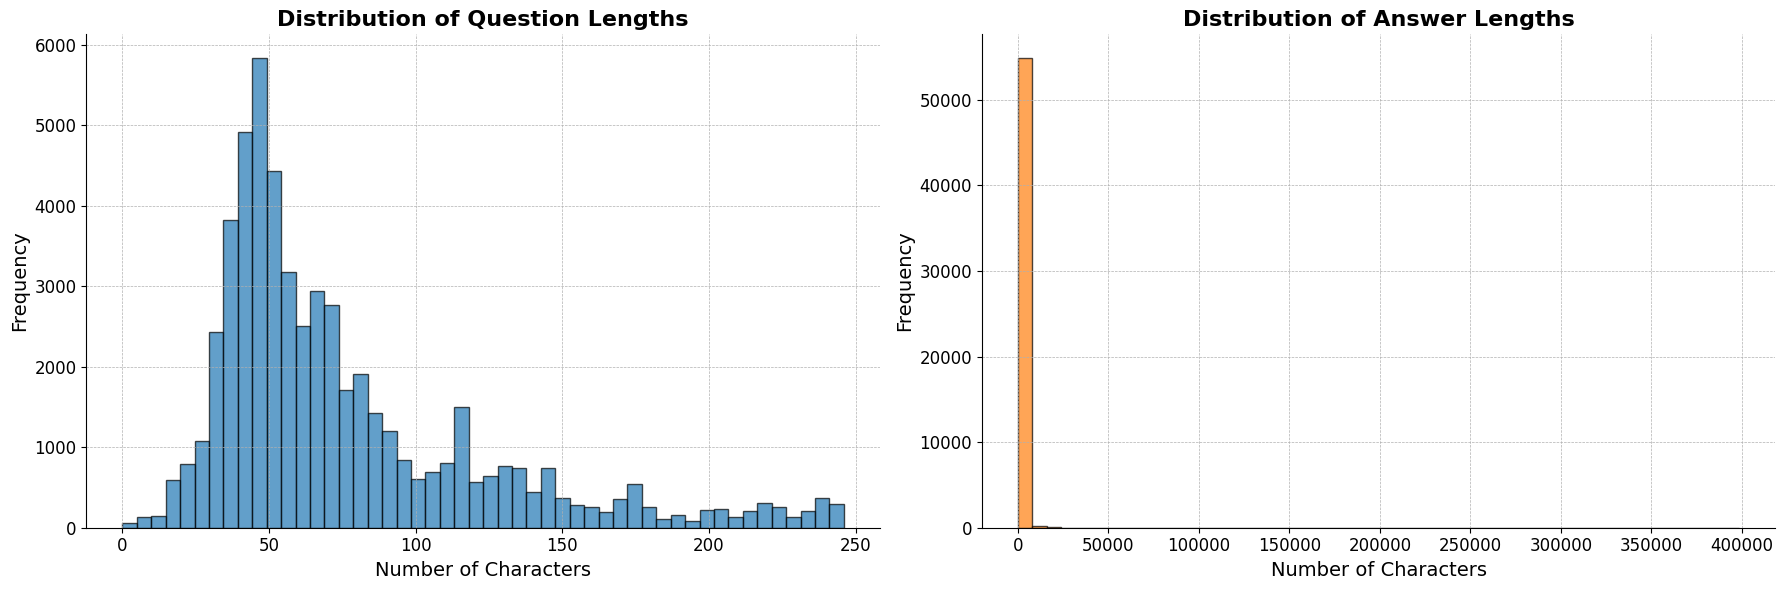

In [13]:
# df['question_length'] = df['question'].str.len()
# df['answer_length'] = df['answer'].str.len()
# Set up the figure and axes with customized size and style
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

# Custom style settings
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(0.8)
ax1.spines['bottom'].set_linewidth(0.8)
ax1.tick_params(axis='both', which='both', labelsize=12, width=0.8)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(0.8)
ax2.spines['bottom'].set_linewidth(0.8)
ax2.tick_params(axis='both', which='both', labelsize=12, width=0.8)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot the distribution of question lengths
ax1.hist(df['question'].str.len(), bins=50, color='#1f77b4', edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Question Lengths', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of Characters', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)

# Plot the distribution of answer lengths
ax2.hist(df['answer'].str.len(), bins=50, color='#ff7f0e', edgecolor='black', alpha=0.7)
ax2.set_title('Distribution of Answer Lengths', fontsize=16, fontweight='bold')
ax2.set_xlabel('Number of Characters', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)

# Adjust layout to fit everything neatly
plt.tight_layout()

# Show the plot
plt.show()

### Word cloud for questions and answers:

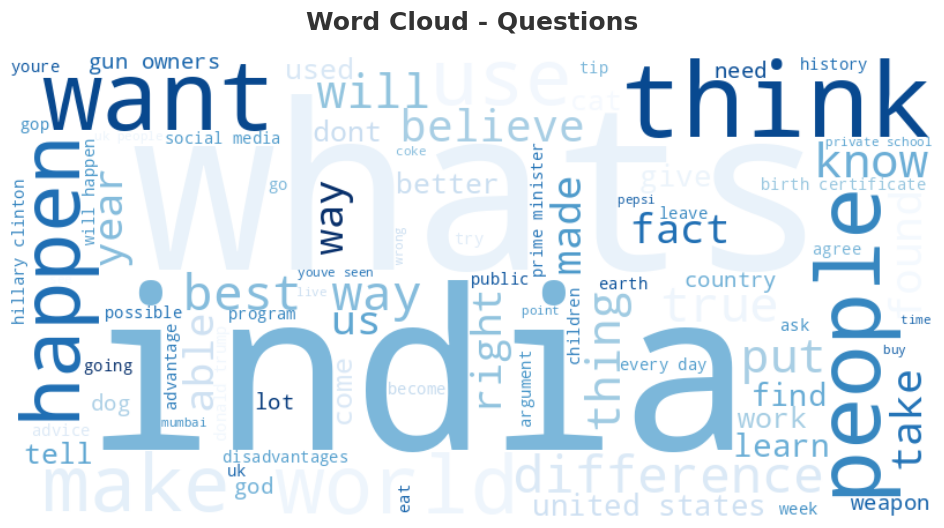

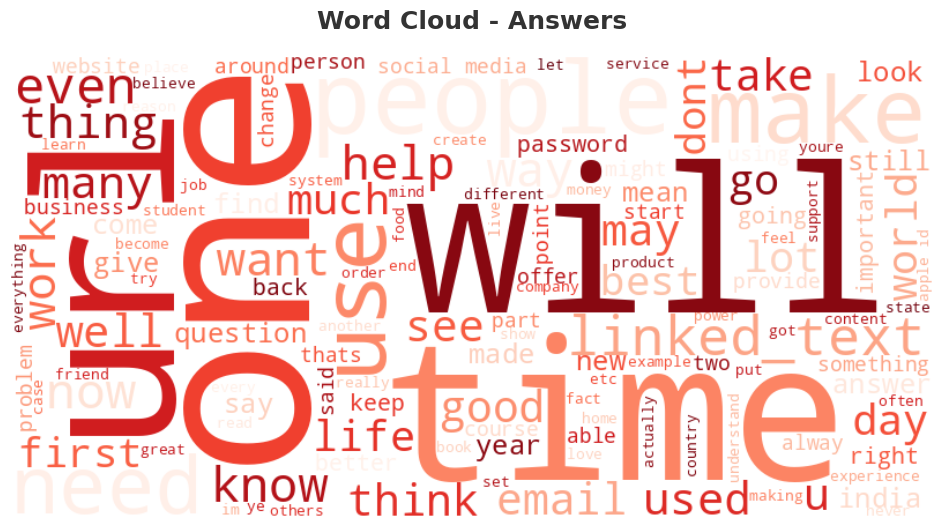

In [14]:
def create_wordcloud(text, title, colormap='viridis', contour_color='black'):
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colormap,           # Color palette for the word cloud
        contour_color=contour_color, # Contour color around words
        contour_width=1,             # Width of the contour
        max_words=200,               # Maximum number of words to include
        min_font_size=10,            # Minimum font size
        max_font_size=200            # Maximum font size
    ).generate(text)
    
    # Create and style the plot
    plt.figure(figsize=(12, 6), dpi=100)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(title, fontsize=18, fontweight='bold', color='#333333', pad=20)  # Title styling
    plt.show()

# Create and display word clouds for questions and answers
create_wordcloud(' '.join(df['question']), 'Word Cloud - Questions', colormap='Blues', contour_color='darkblue')
create_wordcloud(' '.join(df['answer']), 'Word Cloud - Answers', colormap='Reds', contour_color='darkred')

###  Correlation between question and answer lengths:


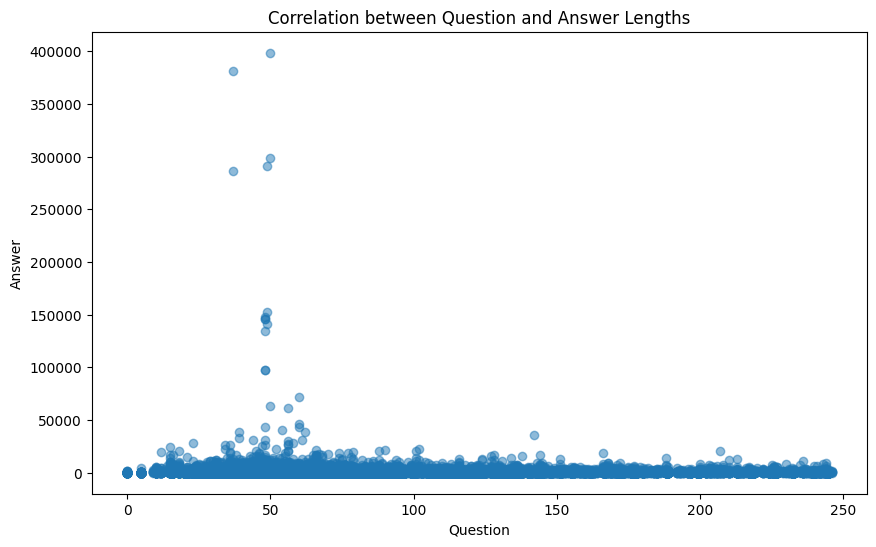

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['question'].str.len(), df['answer'].str.len(), alpha=0.5)
plt.title('Correlation between Question and Answer Lengths')
plt.xlabel('Question')
plt.ylabel('Answer')
plt.show()

print(f"Correlation coefficient: {df['question'].corr(df['answer']):.2f}")

## Top 10 most common words in questions and answers:

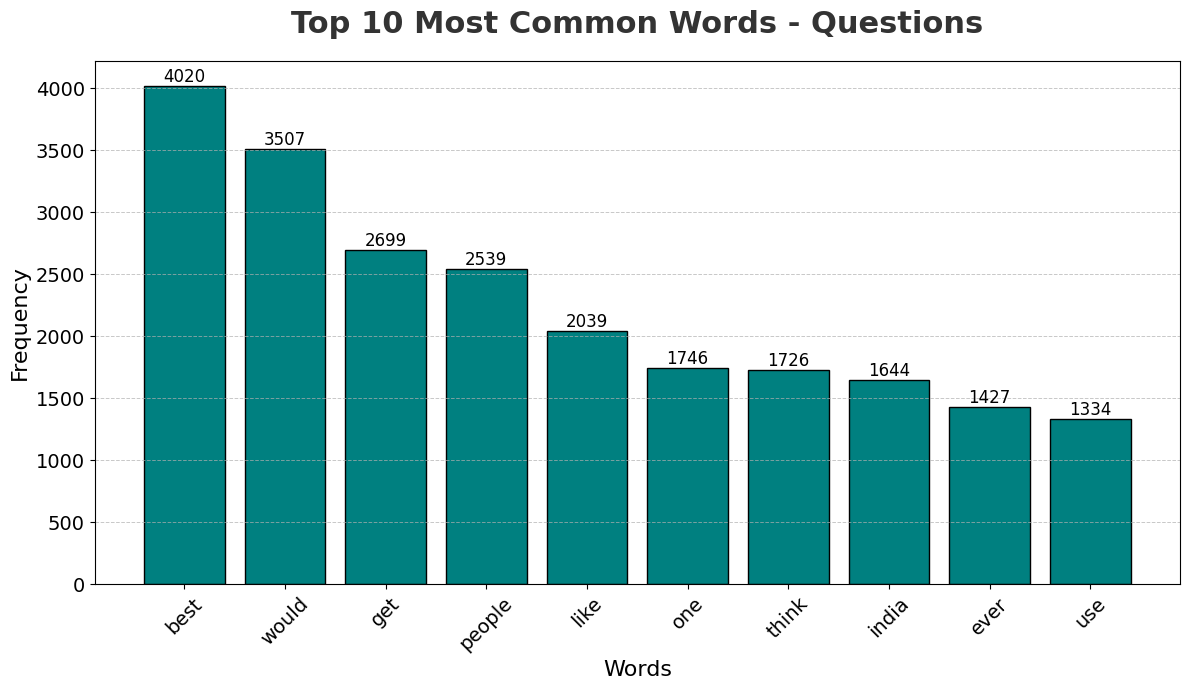

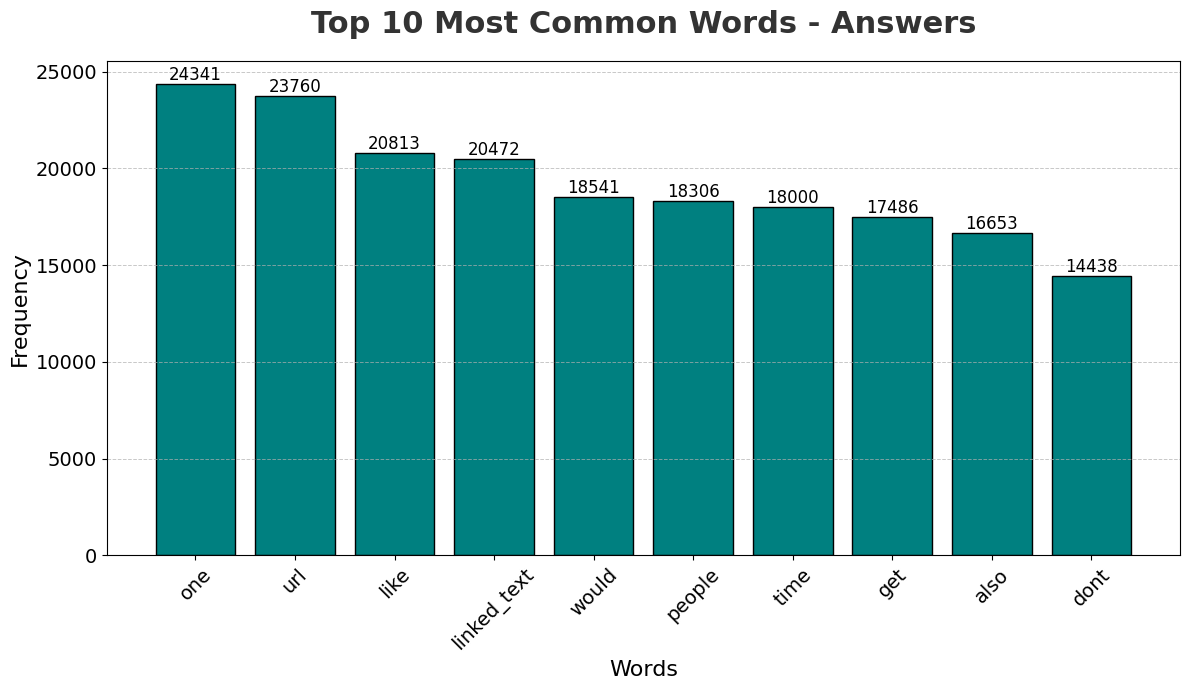

In [16]:
from collections import Counter

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    return ' '.join(tokens)

def plot_top_words(text, title):
    # Combine all text and split into words
    words = ' '.join(text).split()
    word_counts = Counter(words)
    top_words = dict(word_counts.most_common(10))

    # Create the plot
    plt.figure(figsize=(12, 7), dpi=100)

    # Plot the bar chart with enhanced styling
    bars = plt.bar(top_words.keys(), top_words.values(), color='teal', edgecolor='black')

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add title and labels with enhanced styling
    plt.title(f'Top 10 Most Common Words - {title}', fontsize=22, fontweight='bold', color='#333333', pad=20)
    plt.xlabel('Words', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12, color='black')

    # Show the plot with tight layout
    plt.tight_layout()
    plt.show()

# Plot top 10 most common words for questions and answers
plot_top_words(df['question'].apply(preprocess_text), 'Questions')
plot_top_words(df['answer'].apply(preprocess_text), 'Answers')

## Combine question and answer for context

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Create 'context' column
df.loc[:, 'context'] = df['question'] + ' [SEP] ' + df['answer']

# Enhanced function to classify question types
def classify_question_type(question):
    question = question.lower().strip()
    if question.startswith('who'):
        return 'Who'
    elif question.startswith('what'):
        return 'What'
    elif question.startswith('where'):
        return 'Where'
    elif question.startswith('when'):
        return 'When'
    elif question.startswith('why'):
        return 'Why'
    elif question.startswith('how'):
        return 'How'
    else:
        return 'Other'

# Apply the classification function to create 'question_type' column
df.loc[:, 'question_type'] = df['question'].apply(classify_question_type)

# Encode question types
label_encoder = LabelEncoder()
df.loc[:, 'question_type_encoded'] = label_encoder.fit_transform(df['question_type'])

# Create a difficulty score based on question and answer lengths
df.loc[:, 'difficulty_score'] = ((df['question'].str.len()) + (df['answer'].str.len())) / 2



/tmp/ipykernel_24500/3744783272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'context'] = df['question'] + ' [SEP] ' + df['answer']
/tmp/ipykernel_24500/3744783272.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'question_type'] = df['question'].apply(classify_question_type)
/tmp/ipykernel_24500/3744783272.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [60]:
df.head(100)

,question,answer,context,question_type,question_type_encoded,difficulty_score
0,why whenever i get in the shower my girlfriend...,isnt it awful you would swear that there wasnt...,why whenever i get in the shower my girlfriend...,Why,6,67.5
1,what is a proxy and how can i use one,a proxy server is a system or router that prov...,what is a proxy and how can i use one [SEP] a ...,What,2,833.0
2,what song has the lyrics someone left the cake...,macarthurs park,what song has the lyrics someone left the cake...,What,2,38.5
3,i am the owner of an adult website called can ...,dont let apps that are liers put adds on your ...,i am the owner of an adult website called can ...,Other,1,351.0
4,does the bible mention anything about a place ...,st john in the book of revelation mentions an ...,does the bible mention anything about a place ...,Other,1,125.0
...,...,...,...,...,...,...
95,is nasa making the wheels on the mars 2020 rov...,i can see that you have had a few answers deta...,is nasa making the wheels on the mars 2020 rov...,Other,1,221.5
96,what are the musthave iphone apps why,here are my 8 musthave apps for your iphone th...,what are the musthave iphone apps why [SEP] he...,What,2,1353.5
97,what do civil engineers do after graduating if...,frustrated yes civil engineering is a type of ...,what do civil engineers do after graduating if...,What,2,1150.5
98,how can i become a genius like einstein,forget about becoming einstein just be you and...,how can i become a genius like einstein [SEP] ...,How,0,59.5


In [61]:
df.shape

(55182, 6)

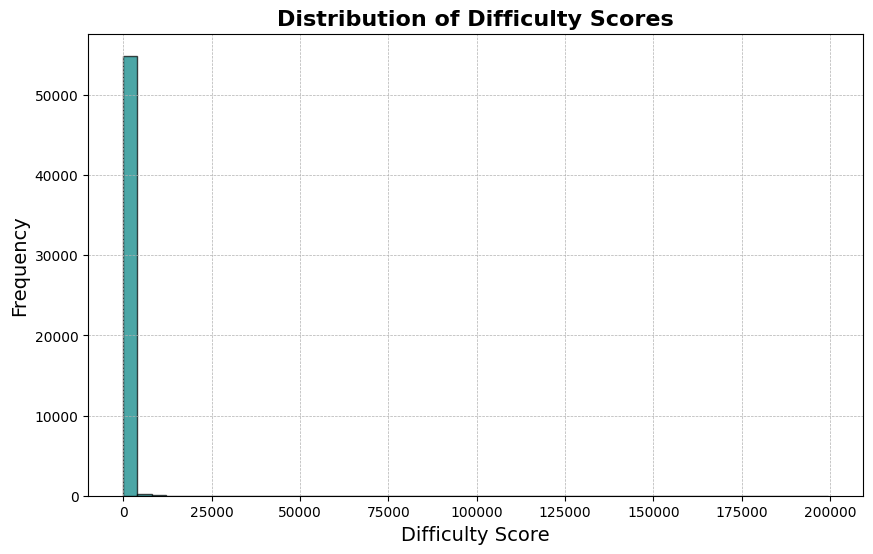

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['difficulty_score'], bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Difficulty Scores', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Fine-tuning GPT (using GPT-2):

In [66]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

# Load pre-trained model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Prepare the dataset
def dataset_preparation(df):
    return df['context'].tolist()

train_texts = dataset_preparation(df)

# Tokenize and create dataset
tokenizer.pad_token = tokenizer.eos_token
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="train.txt",  # Save the train_texts to a file
    block_size=128
)

# Data collator
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Training arguments
training_args = TrainingArguments(
    output_dir="./gpt2_qa_model",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

# Train the model
trainer.train()

# Save the model
trainer.save_model()

2024-07-30 16:31:20.950405: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/rajesh/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'

In [ ]:
!pip install --upgrade transformers datasets


In [ ]:
# !pip install wordcloud
